# Continuous Control

---

This notebook presents my solution to the Continuous Control Project of Udacity's [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program. I implemented a PPO agent to solve version 2 of the environment. 

### 1. Methodology

#### 1.1 Proximal Policy Optimization

After brief research I opted to implement a Proximal Policy Optimization algorithm to solve the environment. In 2017 it was considered the standard algorithm of [Open AI](https://blog.openai.com/openai-baselines-ppo/) for reinforcement learning because it accomplishes the stability and robustness of Trust Region Policy Optimization with higher simplicity and flexibility.

The method defines a surrogate objective function to be used in the optimization scheme. The surrogate function is designed to minimize the distance between the old policy $\Pi_{old}$ and the new policy $\Pi$. Denoting the ratio of the policies as :

$$r(θ)=\frac{\Pi_{\theta}(a|s)}{\Pi_{\theta}^{old}(a|s)}$$

The surrogate objective function is defined as : 

$$ J(θ)=E[min(r(θ)A_{\theta}^{old}(s,a),clip(r(θ),1−\epsilon,1+\epsilon)A_{\theta}^{old}(s,a))] $$

In the last formula, A stands for advantage. To minimize the large policy deviations between steps, the distance $r$ is clipped so that in each update it stays within the bounded region $[1-\epsilon, 1+\epsilon]$, therefore making a pessimistic guess on the policy gradient.

The algorithm works as follows :
0. Initialize the networks with random parameters $\theta$
1. Collect experiences with the policy and save to the buffer
2. Estimate the advantages
3. Run gradient ascent step to update parameters $\theta$
4. Repeat steps 1 to 4 until convergence

#### 1.2 Training parameters

The network architecture used in this work is comprised of two fully connected layers of 64 units with tanh activation for both  the policy and critic. 
The head of the policy network outputs uses tanh for activation function and outputs the Gaussian means, while the standard deviation is set to 1 in all dimensions. 
For the critic network, no activation is used in the last layer.

The hyperparameters used to train the network were :

1. GAMMA = 0.99            # discount factor
2. LR = 5.0e-4             # learning rate 
3. CLIP_RANGE = 0.20       # deviation to the old policy
4. GRAD_CLIP = 5           # gradient clipping
5. NUM_EPOCHS = 10         # number of batch passes
6. BATCH_SIZE = 256        # number of points in each mini batch


### 2. Training the agent
```

In [2]:
import numpy as np
from envwrapper import EnvWrapper
from torch.autograd import Variable

from model import ActorCriticNet
from agent import PPO_Agent

env = EnvWrapper('envs/Reacher_Windows_v2/Reacher.exe')

state = env.reset()
policy = ActorCriticNet(state.shape[-1], env.nA, 1)
agent = PPO_Agent(policy, max_tsteps=2048)
agent.train(env, max_episodes=1024)
agent.save()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of actions: 4
Number of agents: 20
States look like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
State space dimension: 33


c:\program files\python36\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode   0 of 1024 Avg/Last/Min/Max Score : 0.30/0.30/0.30/0.30.
Episode   1 of 1024 Avg/Last/Min/Max Score : 0.34/0.37/0.30/0.37.
Episode   2 of 1024 Avg/Last/Min/Max Score : 0.39/0.50/0.30/0.50.
Episode   3 of 1024 Avg/Last/Min/Max Score : 0.44/0.59/0.30/0.59.
Episode   4 of 1024 Avg/Last/Min/Max Score : 0.47/0.60/0.30/0.60.
Episode   5 of 1024 Avg/Last/Min/Max Score : 0.56/0.97/0.30/0.97.
Episode   6 of 1024 Avg/Last/Min/Max Score : 0.60/0.88/0.30/0.97.
Episode   7 of 1024 Avg/Last/Min/Max Score : 0.65/1.00/0.30/1.00.
Episode   8 of 1024 Avg/Last/Min/Max Score : 0.71/1.21/0.30/1.21.
Episode   9 of 1024 Avg/Last/Min/Max Score : 0.78/1.41/0.30/1.41.
Episode  10 of 1024 Avg/Last/Min/Max Score : 0.82/1.20/0.30/1.41.
Episode  11 of 1024 Avg/Last/Min/Max Score : 0.90/1.72/0.30/1.72.
Episode  12 of 1024 Avg/Last/Min/Max Score : 0.98/1.92/0.30/1.92.
Episode  13 of 1024 Avg/Last/Min/Max Score : 1.05/1.96/0.30/1.96.
Episode  14 of 1024 Avg/Last/Min/Max Score : 1.11/1.98/0.30/1.98.
Episode  1

Episode 122 of 1024 Avg/Last/Min/Max Score : 16.67/28.43/4.18/28.43.
Episode 123 of 1024 Avg/Last/Min/Max Score : 16.91/28.03/4.28/28.43.
Episode 124 of 1024 Avg/Last/Min/Max Score : 17.14/27.51/4.44/28.43.
Episode 125 of 1024 Avg/Last/Min/Max Score : 17.38/27.93/4.65/28.43.
Episode 126 of 1024 Avg/Last/Min/Max Score : 17.61/27.65/4.65/28.43.
Episode 127 of 1024 Avg/Last/Min/Max Score : 17.84/28.55/4.65/28.55.
Episode 128 of 1024 Avg/Last/Min/Max Score : 18.09/29.41/4.69/29.41.
Episode 129 of 1024 Avg/Last/Min/Max Score : 18.33/28.69/4.69/29.41.
Episode 130 of 1024 Avg/Last/Min/Max Score : 18.56/28.13/5.65/29.41.
Episode 131 of 1024 Avg/Last/Min/Max Score : 18.80/29.27/5.94/29.41.
Episode 132 of 1024 Avg/Last/Min/Max Score : 19.03/29.58/6.22/29.58.
Episode 133 of 1024 Avg/Last/Min/Max Score : 19.27/29.79/6.22/29.79.
Episode 134 of 1024 Avg/Last/Min/Max Score : 19.50/30.14/6.56/30.14.
Episode 135 of 1024 Avg/Last/Min/Max Score : 19.72/28.53/7.07/30.14.
Episode 136 of 1024 Avg/Last/Min/M

Episode 240 of 1024 Avg/Last/Min/Max Score : 37.40/45.53/29.42/45.53.
Episode 241 of 1024 Avg/Last/Min/Max Score : 37.54/44.16/29.42/45.53.
Episode 242 of 1024 Avg/Last/Min/Max Score : 37.66/43.44/29.42/45.53.
Episode 243 of 1024 Avg/Last/Min/Max Score : 37.78/43.36/29.42/45.53.
Episode 244 of 1024 Avg/Last/Min/Max Score : 37.93/44.96/29.42/45.53.
Episode 245 of 1024 Avg/Last/Min/Max Score : 38.07/44.46/29.42/45.53.
Episode 246 of 1024 Avg/Last/Min/Max Score : 38.19/43.39/29.42/45.53.
Episode 247 of 1024 Avg/Last/Min/Max Score : 38.35/45.13/30.05/45.53.
Episode 248 of 1024 Avg/Last/Min/Max Score : 38.52/47.52/30.50/47.52.
Episode 249 of 1024 Avg/Last/Min/Max Score : 38.66/44.38/30.70/47.52.
Episode 250 of 1024 Avg/Last/Min/Max Score : 38.81/45.62/31.58/47.52.
Episode 251 of 1024 Avg/Last/Min/Max Score : 38.94/44.41/32.08/47.52.
Episode 252 of 1024 Avg/Last/Min/Max Score : 39.08/46.29/32.08/47.52.
Episode 253 of 1024 Avg/Last/Min/Max Score : 39.22/46.79/32.08/47.52.
Episode 254 of 1024 

Episode 358 of 1024 Avg/Last/Min/Max Score : 49.79/53.20/44.94/56.02.
Episode 359 of 1024 Avg/Last/Min/Max Score : 49.87/53.91/44.94/56.02.
Episode 360 of 1024 Avg/Last/Min/Max Score : 49.93/52.18/44.94/56.02.
Episode 361 of 1024 Avg/Last/Min/Max Score : 50.02/54.81/44.94/56.02.
Episode 362 of 1024 Avg/Last/Min/Max Score : 50.06/52.86/44.94/56.02.
Episode 363 of 1024 Avg/Last/Min/Max Score : 50.13/53.16/44.94/56.02.
Episode 364 of 1024 Avg/Last/Min/Max Score : 50.22/54.01/45.55/56.02.
Episode 365 of 1024 Avg/Last/Min/Max Score : 50.27/53.48/45.55/56.02.
Episode 366 of 1024 Avg/Last/Min/Max Score : 50.36/54.09/45.55/56.02.
Episode 367 of 1024 Avg/Last/Min/Max Score : 50.43/54.26/45.55/56.02.
Episode 368 of 1024 Avg/Last/Min/Max Score : 50.50/53.73/45.55/56.02.
Episode 369 of 1024 Avg/Last/Min/Max Score : 50.57/53.83/45.55/56.02.
Episode 370 of 1024 Avg/Last/Min/Max Score : 50.61/50.65/45.55/56.02.
Episode 371 of 1024 Avg/Last/Min/Max Score : 50.68/53.45/45.55/56.02.
Episode 372 of 1024 

Episode 476 of 1024 Avg/Last/Min/Max Score : 57.37/61.01/52.03/61.53.
Episode 477 of 1024 Avg/Last/Min/Max Score : 57.38/56.82/52.03/61.53.
Episode 478 of 1024 Avg/Last/Min/Max Score : 57.45/60.72/52.03/61.53.
Episode 479 of 1024 Avg/Last/Min/Max Score : 57.48/57.19/52.03/61.53.
Episode 480 of 1024 Avg/Last/Min/Max Score : 57.52/58.86/52.03/61.53.
Episode 481 of 1024 Avg/Last/Min/Max Score : 57.59/60.80/52.03/61.53.
Episode 482 of 1024 Avg/Last/Min/Max Score : 57.65/61.07/52.03/61.53.
Episode 483 of 1024 Avg/Last/Min/Max Score : 57.69/59.30/52.03/61.53.
Episode 484 of 1024 Avg/Last/Min/Max Score : 57.78/62.78/52.03/62.78.
Episode 485 of 1024 Avg/Last/Min/Max Score : 57.85/60.48/52.03/62.78.
Episode 486 of 1024 Avg/Last/Min/Max Score : 57.96/62.50/52.81/62.78.
Episode 487 of 1024 Avg/Last/Min/Max Score : 58.03/61.99/52.81/62.78.
Episode 488 of 1024 Avg/Last/Min/Max Score : 58.10/62.31/52.81/62.78.
Episode 489 of 1024 Avg/Last/Min/Max Score : 58.19/61.66/54.08/62.78.
Episode 490 of 1024 

Episode 594 of 1024 Avg/Last/Min/Max Score : 64.01/67.66/60.57/67.66.
Episode 595 of 1024 Avg/Last/Min/Max Score : 64.01/64.84/60.57/67.66.
Episode 596 of 1024 Avg/Last/Min/Max Score : 64.05/67.13/60.57/67.66.
Episode 597 of 1024 Avg/Last/Min/Max Score : 64.08/64.11/60.57/67.66.
Episode 598 of 1024 Avg/Last/Min/Max Score : 64.11/64.82/60.57/67.66.
Episode 599 of 1024 Avg/Last/Min/Max Score : 64.11/64.52/60.57/67.66.
Episode 600 of 1024 Avg/Last/Min/Max Score : 64.16/67.89/60.57/67.89.
Episode 601 of 1024 Avg/Last/Min/Max Score : 64.17/64.45/60.57/67.89.
Episode 602 of 1024 Avg/Last/Min/Max Score : 64.22/65.02/60.92/67.89.
Episode 603 of 1024 Avg/Last/Min/Max Score : 64.24/64.94/60.92/67.89.
Episode 604 of 1024 Avg/Last/Min/Max Score : 64.28/65.88/60.92/67.89.
Episode 605 of 1024 Avg/Last/Min/Max Score : 64.32/65.61/60.92/67.89.
Episode 606 of 1024 Avg/Last/Min/Max Score : 64.36/67.99/60.92/67.99.
Episode 607 of 1024 Avg/Last/Min/Max Score : 64.39/63.65/60.92/67.99.
Episode 608 of 1024 

Episode 712 of 1024 Avg/Last/Min/Max Score : 66.37/67.34/62.35/69.09.
Episode 713 of 1024 Avg/Last/Min/Max Score : 66.38/66.74/62.35/69.09.
Episode 714 of 1024 Avg/Last/Min/Max Score : 66.40/67.14/62.35/69.09.
Episode 715 of 1024 Avg/Last/Min/Max Score : 66.41/65.25/62.35/69.09.
Episode 716 of 1024 Avg/Last/Min/Max Score : 66.42/67.78/62.35/69.09.
Episode 717 of 1024 Avg/Last/Min/Max Score : 66.43/68.21/62.35/69.09.
Episode 718 of 1024 Avg/Last/Min/Max Score : 66.43/66.61/62.35/69.09.
Episode 719 of 1024 Avg/Last/Min/Max Score : 66.42/66.25/62.35/69.09.
Episode 720 of 1024 Avg/Last/Min/Max Score : 66.40/65.99/62.35/69.09.
Episode 721 of 1024 Avg/Last/Min/Max Score : 66.38/66.47/62.35/69.09.
Episode 722 of 1024 Avg/Last/Min/Max Score : 66.39/66.66/62.35/69.09.
Episode 723 of 1024 Avg/Last/Min/Max Score : 66.36/64.91/62.35/69.09.
Episode 724 of 1024 Avg/Last/Min/Max Score : 66.36/67.15/62.35/69.09.
Episode 725 of 1024 Avg/Last/Min/Max Score : 66.37/66.76/62.35/69.09.
Episode 726 of 1024 

Episode 830 of 1024 Avg/Last/Min/Max Score : 67.37/66.71/63.02/69.93.
Episode 831 of 1024 Avg/Last/Min/Max Score : 67.41/69.31/63.02/69.93.
Episode 832 of 1024 Avg/Last/Min/Max Score : 67.43/68.15/63.02/69.93.
Episode 833 of 1024 Avg/Last/Min/Max Score : 67.43/66.84/63.02/69.93.
Episode 834 of 1024 Avg/Last/Min/Max Score : 67.45/68.20/63.02/69.93.
Episode 835 of 1024 Avg/Last/Min/Max Score : 67.46/67.04/63.02/69.93.
Episode 836 of 1024 Avg/Last/Min/Max Score : 67.50/70.13/63.02/70.13.
Episode 837 of 1024 Avg/Last/Min/Max Score : 67.52/68.44/63.02/70.13.
Episode 838 of 1024 Avg/Last/Min/Max Score : 67.58/70.21/63.02/70.21.
Episode 839 of 1024 Avg/Last/Min/Max Score : 67.61/68.80/63.02/70.21.
Episode 840 of 1024 Avg/Last/Min/Max Score : 67.65/68.48/63.02/70.21.
Episode 841 of 1024 Avg/Last/Min/Max Score : 67.62/66.37/63.02/70.21.
Episode 842 of 1024 Avg/Last/Min/Max Score : 67.64/68.32/63.02/70.21.
Episode 843 of 1024 Avg/Last/Min/Max Score : 67.62/65.42/63.02/70.21.
Episode 844 of 1024 

Episode 948 of 1024 Avg/Last/Min/Max Score : 68.29/66.74/65.45/71.22.
Episode 949 of 1024 Avg/Last/Min/Max Score : 68.26/64.85/64.85/71.22.
Episode 950 of 1024 Avg/Last/Min/Max Score : 68.25/70.02/64.85/70.50.
Episode 951 of 1024 Avg/Last/Min/Max Score : 68.26/69.41/64.85/70.50.
Episode 952 of 1024 Avg/Last/Min/Max Score : 68.24/67.61/64.85/70.50.
Episode 953 of 1024 Avg/Last/Min/Max Score : 68.24/69.37/64.85/70.50.
Episode 954 of 1024 Avg/Last/Min/Max Score : 68.25/69.59/64.85/70.50.
Episode 955 of 1024 Avg/Last/Min/Max Score : 68.23/66.68/64.85/70.50.
Episode 956 of 1024 Avg/Last/Min/Max Score : 68.22/68.01/64.85/70.50.
Episode 957 of 1024 Avg/Last/Min/Max Score : 68.21/68.07/64.85/70.50.
Episode 958 of 1024 Avg/Last/Min/Max Score : 68.22/70.01/64.85/70.50.
Episode 959 of 1024 Avg/Last/Min/Max Score : 68.22/69.42/64.85/70.50.
Episode 960 of 1024 Avg/Last/Min/Max Score : 68.22/69.09/64.85/70.50.
Episode 961 of 1024 Avg/Last/Min/Max Score : 68.22/68.01/64.85/70.50.
Episode 962 of 1024 

In [3]:
env.close()

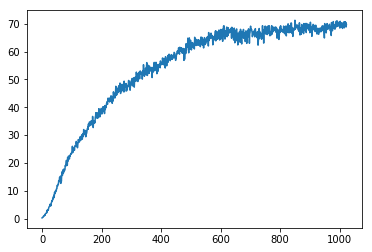

In [3]:
import numpy as np
import matplotlib.pyplot as plt
results = np.loadtxt('log.txt')
plt.plot(results)
plt.show()

### 3. Improvements and future work

As it can be seen, the agent trains steadily, but it takes a 189 steps to converge. One way to speed up the training process is to implement advantage normalization to reduce the gradient variance and improve the signal to noise ratio.

Another important improvement to the PPO framework is the use of Generalized Advantage Estimation, which could be seen as a "higher order" advantage estimation.

Other frameworks could also be implemented, such as DDPG or the more recent D4PG could also be tested.